In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

%matplotlib inline


#définition des constantes nécessaires
pi = constants.pi #pi
r_e = 2.8179403262e-13 #rayon classique de l'électron en cm
m_e = constants.physical_constants["electron mass energy equivalent in MeV"][0] #Masse de l'électron en MeV (Le c^2 est inclu dans la valeur de la masse)
m_p = constants.physical_constants["proton mass energy equivalent in MeV"][0] #Masse du proton en MeV (Le c^2 est inclu dans la valeur de la masse)
rho_eau = 1 #densité de l'eau (de PSTAR) en g/cm^3
rho_os = 1.85 #densité de l'os cortical (de PSTAR) en g/cm^3
I_eau = 0.000075 #énergie moyenne d'excitation de l'eau (de PSTAR) en MeV
I_os = 0.0001064 #énergie moyenne d'excitation de l'os cortical (de PSTAR) en MeV

## Question 1

Selon la recherche, la gamme d'énergie cinétique des protons en protonthérapie varie entre 70 MeV et 250 MeV. La plus grande énergie utilisée est 250 MeV. Pour exprimer $\gamma (\beta)$ et $\gamma (T)$, nous devons faire de l'algèbre simple avec les équations de la dynamique des particules:

$$
\begin{align*}
    T &= (\gamma - 1)m_pc^2 \\ 
    \gamma(T) &= \frac{T}{m_pc^2} + 1
\end{align*}
$$
Où $m_p$ sera la masse du proton puisque c'est la vitesse des protons que l'ont étudiera en protonthérapie.

Pour $\gamma (\beta)$, nous savons que $\beta \equiv \frac{v}{c}$;
$$\gamma = \sqrt{\frac{1}{1 - \beta^2}}$$

De plus, on sait que:
$$
\begin{align*}
    \beta = \sqrt{1-\frac{1}{\gamma^2}}
\end{align*}
$$


## Question 2

* Trouver comment exprimer la densité électronique $n_e$ en fonction de la composition atomique (Z?) et de $\rho$
* Calculer les densités électroniques de l'eau et de l'os cortical?
* Tracer les courbes de stopping power à partir de PSTAR

Par définition, on sait que la densité électronique est définie par le nombre d'électrons par gramme divisé par le volume:
$$
\begin{align*}
    n_e &= \frac{N}{V}
\end{align*}
$$
On peut développer le tout par les définitions usuelles.
$$
\begin{align*}
    n_e &= \frac{N}{V} = \frac{Z N_{atomes}}{\frac{m_{atomes}}{\rho}} = \frac{Z N_{atomes}\rho}{m_{atomes}}
\end{align*}
$$



5.8077993123458934e+23
3.342838276571907e+23


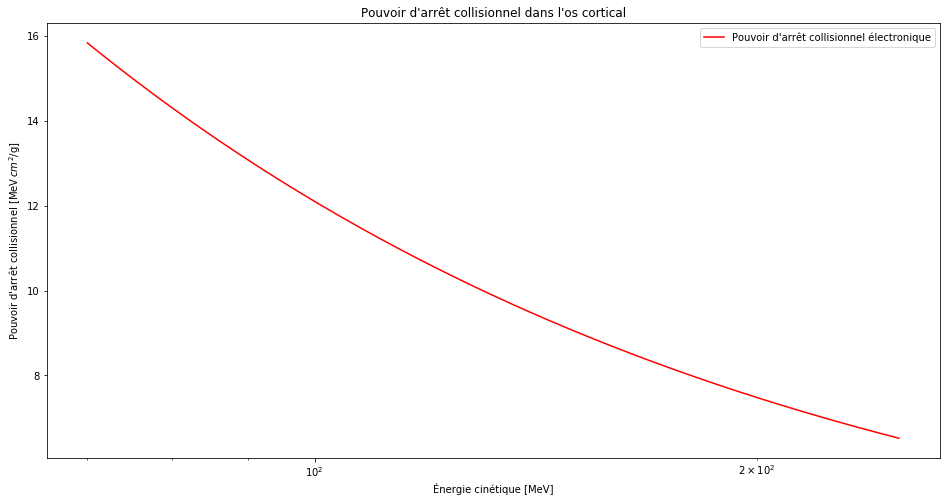

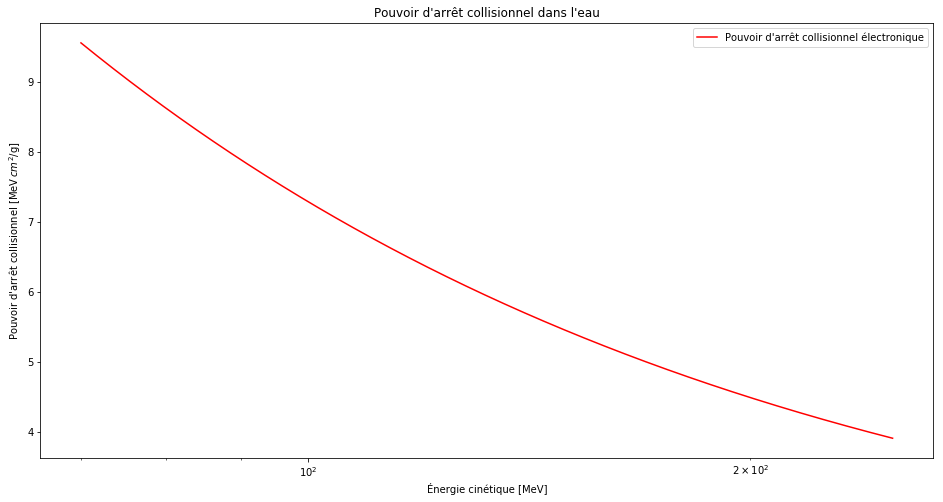

In [4]:
#La classe Milieu accepte comme arguments la densité volumique (rho), la fraction de chaque éléments du milieu en ordre,
#le numéro atomique (Z) dans le même ordre, et la masse molaire (mmol) aussi en ordre. 
class Milieu:
    def __init__(self, rho, frac = [], Z = [], mmol = []):
        self.rho = rho
        self.frac = frac
        self.Z = Z
        self.mmol = mmol

#La fonction edensite donne la densité électronique du milieu.
    def edensite(self):
        n = 0
        for i in range(0, len(self.mmol)):
            n += (self.rho*self.frac[i]*self.Z[i]*(6.022*10**23))/self.mmol[i]
        return n
        
        
frac_os = [0.047234, 0.144330, 0.041990, 0.446096, 0.002200, 0.104970, 0.003150, 0.209930, 0.000100]
Z_os = [1,6,7,8,12,15,16,20,30]
mmol_os = [1.00784, 12.0107, 14.0067, 15.999, 24.305, 30.9738, 32.065, 40.078, 65.38]

os = Milieu(rho_os, frac = frac_os, Z=Z_os, mmol = mmol_os)
eau = Milieu(rho_eau, frac = [0.111894, 0.888106], Z = [1,8], mmol = [1.00784 ,15.999])

ne_os = os.edensite()
ne_eau = eau.edensite()
print(ne_os)
print(ne_eau)

def gamma(T):
    return (T/m_p) + 1

def beta(T):
    return np.sqrt(1-(1/(gamma(T)**2)))

def Te_max(T):
    return 2*m_e*((gamma(T)**2) - 1)/(1 + 2*(gamma(T))*(m_e/m_p) + (m_e/m_p)**2)

def S_col(T, I, n_e):
    return 2*pi*r_e**2*m_e*n_e*(1/beta(T)**2)*(np.log( (2*m_e*beta(T)**2*gamma(T)**2*Te_max(T))/(I)**2 )-2*beta(T)**2)

def plot(n_e, I, titre):
    x = np.linspace(70,250,3000)
    plt.figure(figsize=(16,8))
    plt.plot(x, S_col(x, I, n_e), 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xscale("log")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.legend()
    plt.title(titre)
    plt.show()

plot(ne_os, I_os, "Pouvoir d'arrêt collisionnel dans l'os cortical")
plot(ne_eau, I_eau, "Pouvoir d'arrêt collisionnel dans l'eau")

Nous constatons que le graphique de l'os cortical est semblable mais pas pareil au graphique de l'os cortical venant des tableaux de valeurs de PSTAR. La différence est simple, pour les données de PSTAR, S_col est divisé par la densité volumique de l'os (soit 1.85). Ainsi, les graphiques représentent la même chose, à une constante près.

## Question 3

On doit s'assurer de l'homogénéité dimensionnelle dans l'équation de la porté dans l'approximation CSDA:
$$\begin{align*}
    R_{CSDA} &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'\left[ \text{MeV} \right]}{\frac{S_{col}}{\rho}\left[\text{MeV}/\text{g}/\text{cm}^2\right]}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\left[\text{g}/\text{cm}^2 \right]\\
\end{align*}
$$

Qui est bien ce qu'on devait vérifier.

## Question 4

Dans notre cas, puisqu'on étudie le pouvoir d'arrêt collisionnel d'un proton qui est ralenti par les électrons dans de la matière, on sait que l'on étudie le pouvoir d'arrêt collisionnel électronique.

On peut donc récupérer les données du PSTAR pour le pouvoir d'arrêt collisionel du proton dans l'eau liquide puis dans l'os cortical, et comparer, dans chacun, le pouvoir d'arrêt collisionel électronique avec le pouvoir d'arrêt total sur une plage de 70 à 250 MeV.

On comparera le tout graphiquement avec matplotlib.

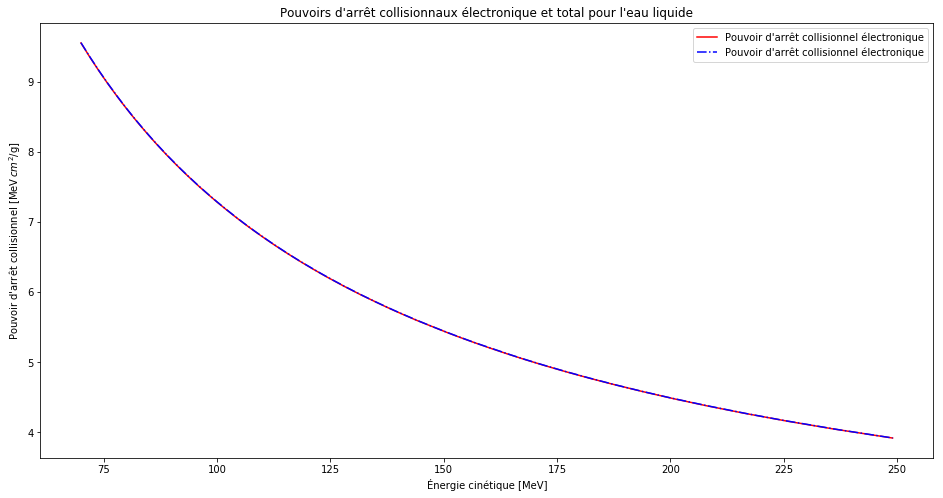

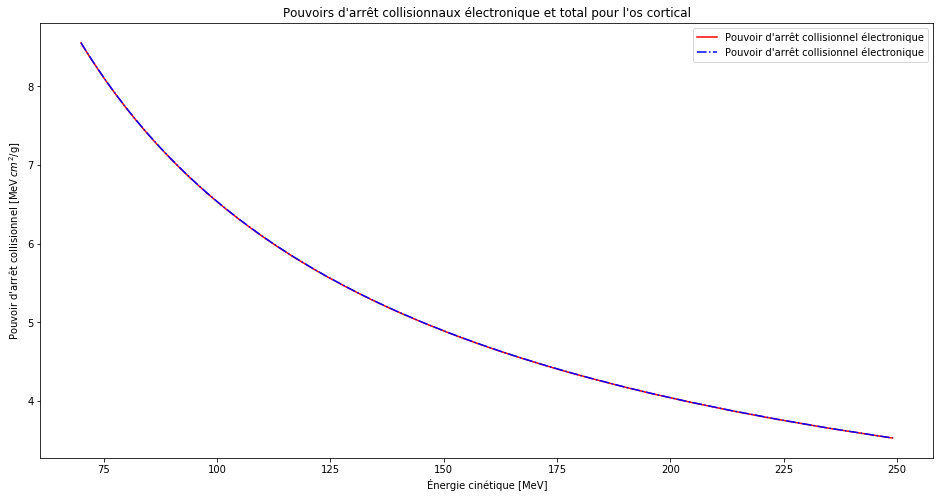

In [5]:
def plot_S_col_PSTAR(nom_de_fichier, titre):
    fichier = np.genfromtxt(nom_de_fichier, skip_header=8, skip_footer=1)
    plt.figure(figsize=(16,8))
    plt.plot(fichier[:,0], fichier[:, 1], 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.plot(fichier[:,0], fichier[:, 2], 'b-.', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.legend()
    plt.title(titre)
    plt.show()
    
plot_S_col_PSTAR("S_col_PSTAR_70-250_eau.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'eau liquide")
plot_S_col_PSTAR("S_col_PSTAR_70-250_os.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'os cortical")

On voit très bien sur les deux graphiques que le pouvoir d'arrêt collisionnel total est très bien approximé par le pouvoir d'arrêt collisionnel électronique dans la plage d'énergie clinique.

## Question 5

Il suffit d'insérer l'intégrale dans Wolfram Alpha pour voir que celle-ci n'est pas analytique. Il est donc nécessaire d'utiliser une méthode numérique puisqu'il n'y a pas d'autres moyens d'obtenir un résultat.

## Question 6

* Écrire une méthode de résolution avec la méthode des trapèzes (easy)
* La rendre adaptative (faire en sorte qu'elle ajuste elle-même le nombre de tranches (N)) (hard)

Il sera premièrement extrêmement pertinent d'écrire nos fonctions sous forme _Python_:

In [6]:
def integrande_de_R(T, I, n_e, rho): # La fonction qu'on intégrera par rapport à T pour obtenir R_CSDA
    return rho/S_col(T, I, n_e)


def trapezes(f, a, b, N, precision):
    x = np.linspace(a,b,N+1) # N+1 parce que Python commence à indexer à 0
    y = f(x)
    y_droit = y[1:] # points droits du trapèze
    y_gauche = y[:-1] # points gauches du trapèze
    h = (b - a)/N # Largeur des tranches
    I = (h/2) * np.sum(y_droit + y_gauche) # Résultat
    precision_actuelle = np.inf # On met la précision la plus haute possible pour pouvoir la descendre
    while precision_actuelle >= precision:
        integrale_precedente = I
        N = 2*N # On double le nombre de tranches
        h = (b - a)/N
        x = np.linspace(a, b, N+1)[1::2] # On prend seulement les nombres impaires pour ne pas réévaluer le résultat précédent
        I = I/2 + h * np.sum(f(x))
        precision_actuelle = abs(integrale_precedente - I)/3
    return I, precision_actuelle, N # I: Résultat, precision_actuelle: Précision du résultat, N: Nombre de tranches

S_col_eau = lambda x: integrande_de_R(x, I_eau, ne_eau, rho_eau) # on redéfinit les fonctions S_col multivariées comme des fonctions à une variable
S_col_os = lambda x: integrande_de_R(x, I_os, ne_os, rho_os)

Après avoir redéfini les fonctions en fonctions à une variable. On pourra obtenir le résultat de la fonction trapèzes. 

In [7]:
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau: ", trapezes(S_col_eau,3,100, 10, 1e-9))
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical: ",trapezes(S_col_os,3,100, 10, 1e-9))

Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau:  (7.696317638438946, 5.295482570962425e-10, 40960)
Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical:  (8.608028114112656, 6.065405955268943e-10, 40960)


## Question 7

On commence par faire les définitions:
$$\begin{align*}
    a &= 2m_e & b &= 1 + \left( \frac{m_e}{m_p} \right)^2 & 
    d &= \frac{m_e}{m_p}
\end{align*}$$

Dans lesquelles on a changé le $c$ de l'énoncé pour ne pas le confondre avec la vitesse de la lumière qui est aussi utilisée plus haut dans l'énoncé. On peut donc définir:

$$\begin{align*}
    T_e^{max} &= \frac{a\left( \gamma^2 -1\right)}{b+d\gamma}
\end{align*}$$

Et finalement:

$$\begin{align*}
    U &= 2\pi r_e^2 m_e c^2 n_e & k &= \frac{a^2}{I^2}
\end{align*}$$
Notre fonction $S_{col}$ devient donc:
$$\begin{align*}
    S_{col} &= \frac{U \left(\ln \left[\frac{a \beta ^2 \gamma ^2 \left(\gamma ^2-1\right) k}{b+d \gamma }\right]-2 \beta
   ^2\right)}{\beta ^2}\\
   &= \frac{U \left(\ln {\left[\frac{a \left(1-\frac{1}{\gamma ^2}\right) \gamma ^2 \left(\gamma ^2-1\right) k}{b+d
   \gamma }\right]}-2 \left(1-\frac{1}{\gamma ^2}\right)\right)}{1-\frac{1}{\gamma ^2}}\\
   &= \frac{U \left(\gamma ^2 \ln \left[\frac{a \left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]-2 \gamma
   ^2+2\right)}{\gamma ^2-1}
\end{align*}$$

Il sera plus simple d'évaluer premièrement la dérivée par rapport à gamma et ensuite trouver la dérivée de $S_{col}$ par rapport à $T$ avec:

$$\begin{align*}
    \frac{\text{d}S_{col}}{\text{d} T} &= \frac{\text{d}S_{col}}{\text{d}\gamma} \frac{\text{d}\gamma}{\text{d}T}
\end{align*}$$
Après une quantité incroyable de dérivations de produits, on obtient:

$$
\begin{align*}
    \frac{\text{d}S_{col}}{\text{d}\gamma} &= \frac{U \left(\frac{\gamma^2 (\gamma d+b) \left(\frac{4 \gamma
   \left(\gamma^2-1\right) a k}{\gamma d+b}-\frac{\left(\gamma^2-1\right)^2 a d
   k}{(\gamma d+b)^2}\right)}{\left(\gamma^2-1\right)^2 a k}+2 \gamma \ln
   \left[\frac{\left(\gamma^2-1\right)^2 a k}{\gamma d+b}\right]-4
   \gamma\right)}{\gamma^2-1}-\frac{2 \gamma U \left(\gamma^2 \ln
   \left[\frac{\left(\gamma^2-1\right)^2 a k}{\gamma d+b}\right]-2
   \gamma^2+2\right)}{\left(\gamma^2-1\right)^2}\\
   &= \frac{\gamma  U \left(\gamma  \left(4 b \gamma +3 d \gamma ^2+d\right)-2 (b+d \gamma ) \ln \left[\frac{a
   \left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]\right)}{\left(\gamma ^2-1\right)^2 (b+d \gamma )}
\end{align*}
$$
Il suffira de multiplier le tout par:
$$
\begin{align*}
    \frac{\text{d}\gamma}{\text{d}T} &= \frac{\text{d}\left(\frac{T}{m_pc^2} + 1 \right)}{\text{d}T}\\
    &= \frac{1}{m_p c^2}
\end{align*}
$$
Puisque notre valeur de $m_p$ est en MeV, on a:
$$
\begin{align*}
    \frac{\text{d}\gamma}{\text{d}T} &= \frac{1}{m_p}
\end{align*}
$$
On a donc que la dérivée est:
$$
\begin{align}
   \frac{\text{d}S_{col}}{\text{d}T} &= \frac{\gamma  U \left(\gamma  \left(4 b \gamma +3 d \gamma ^2+d\right)-2 (b+d \gamma ) \ln \left[\frac{a
   \left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]\right)}{m_p\left(\gamma ^2-1\right)^2 (b+d \gamma )}
\end{align}
$$

Sous forme _Python_, on aura:

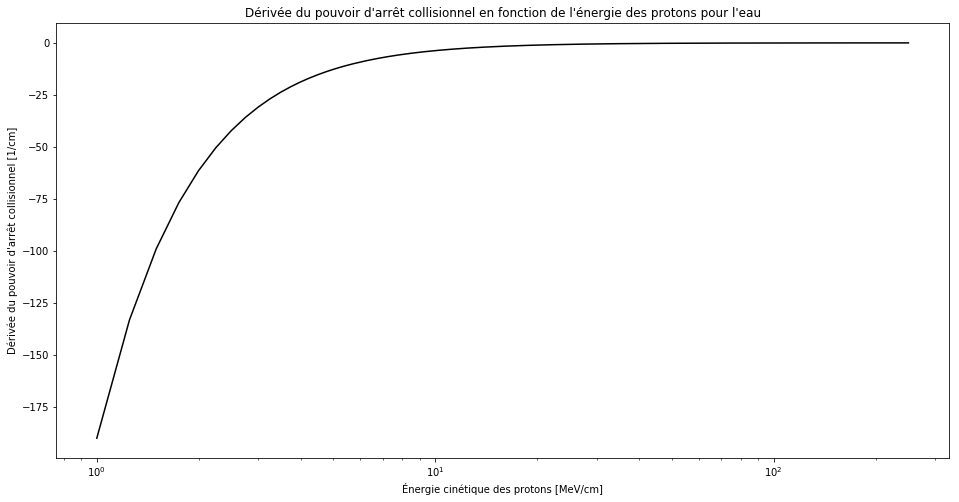

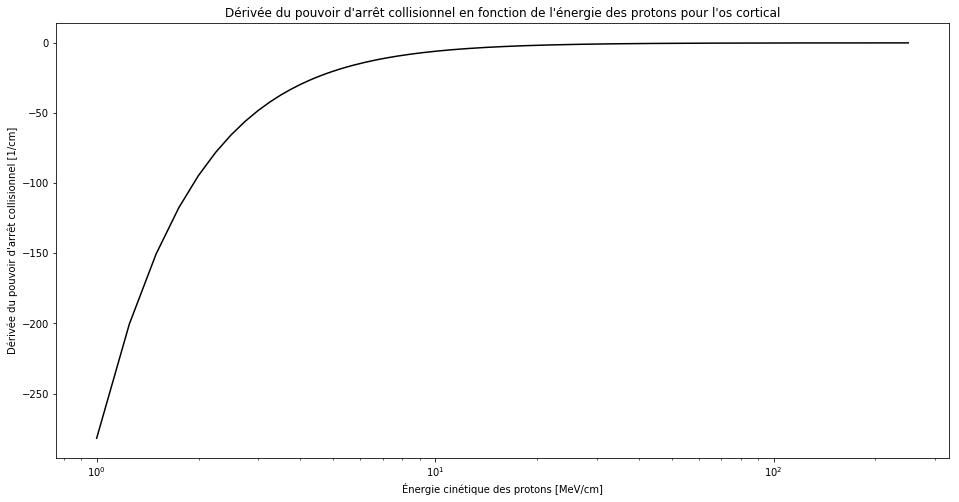

In [8]:
a = 2*m_e
b = 1 + (m_e/m_p)**2
d = m_e/m_p

def d_S_col(T, I, n_e): # Traduction en Python de l'expression de la dérivée de S_col
    a = 2*m_e
    b = 1 + (m_e/m_p)**2
    d = m_e/m_p
    U = 2*pi*r_e**2*m_e*n_e
    k = a**2/I**2
    return (gamma(T)*U*(gamma(T)*(4*b*gamma(T)+3*d*gamma(T)**2+d)-2*(b+d*gamma(T))*np.log((a*(gamma(T)**2-1)**2*k)/(b+d*gamma(T))) ))/(m_p*((gamma(T))**2-1)**2*(b+d*gamma(T)))

linspace = np.linspace(1, 250, 1000)

plt.figure(figsize=(16,8))
plt.xscale("log")
plt.xlabel("Énergie cinétique des protons [MeV/cm]")
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel [1/cm]")
plt.title("Dérivée du pouvoir d'arrêt collisionnel en fonction de l'énergie des protons pour l'eau")
plt.plot(linspace, d_S_col(linspace, I_eau, ne_eau), "k-")

plt.figure(figsize=(16,8))
plt.xscale("log")
plt.xlabel("Énergie cinétique des protons [MeV/cm]")
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel [1/cm]")
plt.title("Dérivée du pouvoir d'arrêt collisionnel en fonction de l'énergie des protons pour l'os cortical")
plt.plot(linspace, d_S_col(linspace, I_os, ne_os), "k-")
plt.show()

## Question 8

Avec le premier terme de la formule d'Euler-Maclaurin, on sait que l'erreur sur l'intégrale des trapèzes sera:
$$
\begin{align*}
    \epsilon &= \frac{1}{12}h^2 \left| f'(a) - f'(b) \right|
\end{align*}
$$
Puisqu'on avait comme résultat, erreur et nombre de tranches:

In [15]:
%timeit -r1 -n1 print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau: ", trapezes(S_col_eau,3,100, 10, 1e-9))
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical: ",trapezes(S_col_os,3,100, 10, 1e-9))

Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau:  (7.696317638438946, 5.295482570962425e-10, 40960)
4.84 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical:  (8.608028114112656, 6.065405955268943e-10, 40960)


On a comme valeurs:

$$
\begin{align*}
    a &= 3\,\text{MeV} & b &= 100\,\text{MeV} & N &= 40960
\end{align*}
$$

Ainsi, on pourra trouver:

In [12]:
def err_trapezes(derivee, a, b, N):
    h = (b-a)/N
    return (1/12)*h**2*np.abs(derivee(a)-derivee(b))

d_S_col_eau = lambda x: d_S_col(x, I_eau, ne_eau) # on redéfinit les fonctions d_S_col multivariées comme des fonctions à une variable
d_S_col_os = lambda x: d_S_col(x, I_os, ne_os)

print("Erreur sur la méthode des trapèzes pour l'eau: ", err_trapezes(d_S_col_eau, 3, 100, 40960))
print("Erreur sur la méthode des trapèzes pour l'os cortical: ", err_trapezes(d_S_col_os, 3, 100, 40960))

Erreur sur la méthode des trapèzes pour l'eau:  1.4397379898436742e-05
Erreur sur la méthode des trapèzes pour l'os cortical:  2.2493051112103258e-05


On voit que ces erreurs sont beaucoup plus grandes que celles trouvées au numéro 6.

## Question 9

## Question 10

## Question 11

## Question 12

## Question 13

## Question 14